In [8]:
import torch.nn as nn
import torch.utils.model_zoo as model_zoo

__all__ = ['ResNet50', 'resnet50']

model_urls = {
    'resnet50': 'https://download.pytorch.org/models/resnet50-19c8e357.pth',
}

In [9]:
# Our TARGET MODEL

In [10]:
import os

def save_model(model, model_name, save_dir='saved_models'):
    # Create the save directory if it doesn't exist
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    # Save the model's state
    save_path = os.path.join(save_dir, f"{model_name}.pth")
    torch.save(model.state_dict(), save_path)
    print(f"Model saved to {save_path}")


In [6]:


class VGG19(nn.Module):
    def __init__(self, num_classes=10):
        super(VGG19, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.avgpool = nn.AdaptiveAvgPool2d((7, 7))

        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),  # Modify the input shape to match the output shape after the last conv layer
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)  # Flatten the output tensor
        x = self.classifier(x)
        return x

In [16]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data import random_split

# Define the CNN model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Define the ResNet8 model
class ResNet8(nn.Module):
    def __init__(self, num_classes=10):
        super(ResNet8, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.layer1 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.layer3 = nn.Sequential(
            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)

        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)

        return x

# Define the ResNet50 model

class ResNet50(nn.Module):
    def __init__(self, num_classes=10):
        super(ResNet50, self).__init__()
        self.inplanes = 64
        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.layer1 = self._make_layer(64, 3)
        self.layer2 = self._make_layer(128, 4, stride=2)
        self.layer3 = self._make_layer(256, 6, stride=2)
        self.layer4 = self._make_layer(512, 3, stride=2)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512 * 4, num_classes)

    def _make_layer(self, planes, blocks, stride=1):
        downsample = None
        if stride != 1 or self.inplanes != planes * 4:
            downsample = nn.Sequential(
                nn.Conv2d(self.inplanes, planes * 4, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(planes * 4),
            )

        layers = []
        layers.append(Bottleneck(self.inplanes, planes, stride, downsample))
        self.inplanes = planes * 4
        for i in range(1, blocks):
            layers.append(Bottleneck(self.inplanes, planes))

        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)

        return x

class Bottleneck(nn.Module):
    expansion = 4

    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super(Bottleneck, self).__init__()
        self.conv1 = nn.Conv2d(inplanes, planes, kernel_size=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)
        self.conv3 = nn.Conv2d(planes, planes * self.expansion, kernel_size=1, bias=False)
        self.bn3 = nn.BatchNorm2d(planes * self.expansion)
        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        residual = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)

        out = self.conv3(out)
        out = self.bn3(out)

        if self.downsample is not None:
            residual = self.downsample(x)

        out += residual
        out = self.relu(out)

        return out


# Define the SqueezeNet model
class FireModule(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(FireModule, self).__init__()

        self.squeeze = nn.Conv2d(in_channels, out_channels, kernel_size=1)
        self.expand1x1 = nn.Conv2d(out_channels, out_channels, kernel_size=1)
        self.expand3x3 = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1)

    def forward(self, x):
        x = F.relu(self.squeeze(x))
        return torch.cat([
            F.relu(self.expand1x1(x)),
            F.relu(self.expand3x3(x))
        ], dim=1)

class SqueezeNet(nn.Module):
    def __init__(self, num_classes=10):
        super(SqueezeNet, self).__init__()
        self.num_classes = num_classes
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=1, stride=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=1, stride=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=1, stride=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=1, stride=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(512, self.num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x


# Define the accuracy function
def accuracy(outputs, labels):
    _, predicted = torch.max(outputs.data, 1)
    total = labels.size(0)
    correct = (predicted == labels).sum().item()
    return correct / total

# Split the CIFAR-10 dataset into 70% for small ensemble models and 30% for the target model
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

train_dataset_small, train_dataset_target = random_split(dataset, [35000, 15000])

train_loader_small = DataLoader(train_dataset_small, batch_size=64,
                                          shuffle=True, num_workers=2)
train_loader_target = DataLoader(train_dataset_target, batch_size=64,
                                          shuffle=True, num_workers=2)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

test_loader = DataLoader(test_dataset, batch_size=64,
                                         shuffle=False, num_workers=2)

# Train the small ensemble models on different GPUs
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
cnn_model = CNN().to(device)
resnet8_model = ResNet8().to(device)
resnet50_model = ResNet50().to(device)
squeeze_model = SqueezeNet().to(device)

optimizer_cnn = optim.SGD(cnn_model.parameters(),lr=0.001, momentum=0.9)
optimizer_resnet8 = optim.SGD(resnet8_model.parameters(), lr=0.001, momentum=0.9)
optimizer_resnet50 = optim.SGD(resnet50_model.parameters(), lr=0.001, momentum=0.9)
optimizer_squeeze = optim.SGD(squeeze_model.parameters(), lr=0.001, momentum=0.9)

criterion = nn.CrossEntropyLoss()

for epoch in range(50):
    running_loss_cnn = 0.0
    running_loss_resnet8 = 0.0
    running_loss_resnet50 = 0.0
    running_loss_squeeze = 0.0
    total_accuracy_cnn = 0.0
    total_accuracy_resnet8 = 0.0
    total_accuracy_resnet50 = 0.0
    total_accuracy_squeeze = 0.0

    cnn_model.train()
    resnet8_model.train()
    resnet50_model.train()
    squeeze_model.train()

    for i, data in enumerate(train_loader_small, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer_cnn.zero_grad()
        optimizer_resnet8.zero_grad()
        optimizer_resnet50.zero_grad()
        optimizer_squeeze.zero_grad()

        outputs_cnn = cnn_model(inputs)
        outputs_resnet8 = resnet8_model(inputs)
        outputs_resnet50 = resnet50_model(inputs)
        outputs_squeeze = squeeze_model(inputs)

        loss_cnn = criterion(outputs_cnn, labels)
        loss_resnet8 = criterion(outputs_resnet8, labels)
        loss_resnet50 = criterion(outputs_resnet50, labels)
        loss_squeeze = criterion(outputs_squeeze, labels)

        loss_cnn.backward()
        loss_resnet8.backward()
        loss_resnet50.backward()
        loss_squeeze.backward()

        optimizer_cnn.step()
        optimizer_resnet8.step()
        optimizer_resnet50.step()
        optimizer_squeeze.step()

        running_loss_cnn += loss_cnn.item()
        running_loss_resnet8 += loss_resnet8.item()
        running_loss_resnet50 += loss_resnet50.item()
        running_loss_squeeze += loss_squeeze.item()

        total_accuracy_cnn += accuracy(outputs_cnn, labels)
        total_accuracy_resnet8 += accuracy(outputs_resnet8, labels)
        total_accuracy_resnet50 += accuracy(outputs_resnet50, labels)
        total_accuracy_squeeze += accuracy(outputs_squeeze, labels)

    # Calculate the accuracy and loss on the validation set for the small ensemble models
    cnn_model.eval()
    resnet8_model.eval()
    resnet50_model.eval()
    squeeze_model.eval()

    with torch.no_grad():
        total_correct_cnn = 0
        total_correct_resnet8 = 0
        total_correct_resnet50 = 0
        total_correct_squeeze = 0
        total_loss_cnn = 0.0
        total_loss_resnet8 = 0.0
        total_loss_resnet50 = 0.0
        total_loss_squeeze = 0.0

        for data in test_loader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            outputs_cnn = cnn_model(inputs)
            outputs_resnet8 = resnet8_model(inputs)
            outputs_resnet50 = resnet50_model(inputs)
            outputs_squeeze = squeeze_model(inputs)

            total_loss_cnn += criterion(outputs_cnn, labels).item()
            total_loss_resnet8 += criterion(outputs_resnet8, labels).item()
            total_loss_resnet50 += criterion(outputs_resnet50, labels).item()
            total_loss_squeeze += criterion(outputs_squeeze, labels).item()

            total_correct_cnn += (outputs_cnn.argmax(dim=1) == labels).sum().item()
            total_correct_resnet8 += (outputs_resnet8.argmax(dim=1) == labels).sum().item()
            total_correct_resnet50 += (outputs_resnet50.argmax(dim=1) == labels).sum().item()
            total_correct_squeeze += (outputs_squeeze.argmax(dim=1) == labels).sum().item()

        accuracy_cnn = total_correct_cnn / len(test_loader.dataset)
        accuracy_resnet8 = total_correct_resnet8 / len(test_loader.dataset)
        accuracy_resnet50 = total_correct_resnet50 / len(test_loader.dataset)
        accuracy_squeeze = total_correct_squeeze / len(test_loader.dataset)

        validation_loss_cnn = total_loss_cnn / len(test_loader.dataset)
        validation_loss_resnet8 = total_loss_resnet8 / len(test_loader.dataset)
        validation_loss_resnet50 = total_loss_resnet50 / len(test_loader.dataset)
        validation_loss_squeeze = total_loss_squeeze / len(test_loader.dataset)

        print('Epoch: %d \n '
              'Cnn loss: %.3f  Cnn accuracy: %.3f  \n'
              'ResNet8 loss: %.3f  ResNet8 accuracy: %.3f  \n'
              'ResNet50 loss: %.3f  ResNet50 accuracy: %.3f \n '
              'SqueezeNet loss: %.3f  SqueezeNet accuracy: %.3f\n' %
              (epoch + 1,
               running_loss_cnn / len(train_loader_small),
               total_accuracy_cnn / len(train_loader_small),
               running_loss_resnet8 / len(train_loader_small),
               total_accuracy_resnet8 / len(train_loader_small),
               running_loss_resnet50 / len(train_loader_small),
               total_accuracy_resnet50 / len(train_loader_small),
               running_loss_squeeze / len(train_loader_small),
               total_accuracy_squeeze / len(train_loader_small)))
        print('Validation Cnn loss: %.3f  Validation Cnn accuracy: %.3f \n '
              'Validation ResNet8 loss: %.3f  Validation ResNet8 accuracy: %.3f \n '
              'Validation ResNet50 loss: %.3f  Validation ResNet50 accuracy: %.3f \n '
              'Validation SqueezeNet loss: %.3f  Validation SqueezeNet accuracy: %.3f\n' %
              (validation_loss_cnn, accuracy_cnn,
               validation_loss_resnet8, accuracy_resnet8,
               validation_loss_resnet50, accuracy_resnet50,
               validation_loss_squeeze, accuracy_squeeze))

# Perform bidirectional knowledge transfer from the small ensemble models to the target model
target_model = VGG19().to(device)
import torch.nn.init as init

def weight_init(m):
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
        init.kaiming_normal_(m.weight)
        if m.bias is not None:
            init.constant_(m.bias, 0)

# Initialize the target model's weights
target_model.apply(weight_init)

optimizer_target = optim.SGD(target_model.parameters(), lr=0.0001, momentum=0.9)  # Decrease the learning rate

for epoch in range(50):
    running_loss_target = 0.0
    total_accuracy_target = 0.0

    target_model.train()

    for i, data in enumerate(train_loader_target, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer_target.zero_grad()

        with torch.no_grad():
            outputs_cnn = cnn_model(inputs)
            outputs_resnet8 = resnet8_model(inputs)
            outputs_resnet50 = resnet50_model(inputs)
            outputs_squeeze = squeeze_model(inputs)

        outputs_target = target_model(inputs)

        loss_target = criterion(outputs_target, labels)

        loss_transfer_cnn = criterion(outputs_target, outputs_cnn)
        loss_transfer_resnet8 = criterion(outputs_target, outputs_resnet8)
        loss_transfer_resnet50 = criterion(outputs_target, outputs_resnet50)
        loss_transfer_squeeze = criterion(outputs_target, outputs_squeeze)

        loss = loss_target + 0.01 * (loss_transfer_cnn + loss_transfer_resnet8 + loss_transfer_resnet50 + loss_transfer_squeeze)


        loss.backward()

        # Add gradient clipping
        torch.nn.utils.clip_grad_norm_(target_model.parameters(), max_norm=1.0)

        optimizer_target.step()

        running_loss_target += loss_target.item()
        total_accuracy_target += accuracy(outputs_target, labels)

    # Calculate the accuracy and loss on the validation set for the target model
    target_model.eval()

    with torch.no_grad():
        total_correct_target = 0
        total_loss_target = 0.0

        for data in test_loader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            outputs_target = target_model(inputs)

            total_loss_target += criterion(outputs_target, labels).item()
            total_correct_target += (outputs_target.argmax(dim=1) == labels).sum().item()

        accuracy_target = total_correct_target / len(test_loader.dataset)
        validation_loss_target = total_loss_target / len(test_loader.dataset)

        print('Epoch: %d  Target loss: %.3f  Target accuracy: %.3f' %
              (epoch + 1, running_loss_target / len(train_loader_target), total_accuracy_target / len(train_loader_target)))
        print('         Validation Target loss: %.3f  Validation Target accuracy: %.3f' %
              (validation_loss_target, accuracy_target))




Files already downloaded and verified
Files already downloaded and verified
Epoch: 1 
 Cnn loss: 2.135  Cnn accuracy: 0.253  
ResNet8 loss: 1.383  ResNet8 accuracy: 0.498  
ResNet50 loss: 1.940  ResNet50 accuracy: 0.339 
 SqueezeNet loss: 2.303  SqueezeNet accuracy: 0.100

Validation Cnn loss: 0.030  Validation Cnn accuracy: 0.334 
 Validation ResNet8 loss: 0.021  Validation ResNet8 accuracy: 0.530 
 Validation ResNet50 loss: 0.027  Validation ResNet50 accuracy: 0.441 
 Validation SqueezeNet loss: 0.036  Validation SqueezeNet accuracy: 0.100

Epoch: 2 
 Cnn loss: 1.793  Cnn accuracy: 0.369  
ResNet8 loss: 0.997  ResNet8 accuracy: 0.647  
ResNet50 loss: 1.582  ResNet50 accuracy: 0.467 
 SqueezeNet loss: 2.303  SqueezeNet accuracy: 0.099

Validation Cnn loss: 0.027  Validation Cnn accuracy: 0.397 
 Validation ResNet8 loss: 0.018  Validation ResNet8 accuracy: 0.587 
 Validation ResNet50 loss: 0.029  Validation ResNet50 accuracy: 0.475 
 Validation SqueezeNet loss: 0.036  Validation Squeez

In [10]:
# Calculate the output dimensions of the features part of VGG19
sample_input = torch.randn(1, 3, 32, 32)  # Assuming input size is 32x32
sample_output = VGG19.features(sample_input)
print("Sample output size:", sample_output.size())


AttributeError: type object 'VGG19' has no attribute 'features'

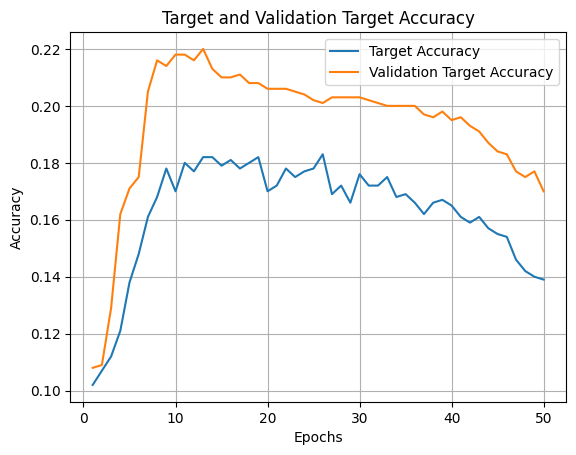

In [20]:
import matplotlib.pyplot as plt

epochs = list(range(1, 51))
target_accuracy = [0.102, 0.107, 0.112, 0.121, 0.138, 0.148, 0.161, 0.168, 0.178, 0.170, 0.180, 0.177, 0.182, 0.182, 0.179, 0.181, 0.178, 0.180, 0.182, 0.170, 0.172, 0.178, 0.175, 0.177, 0.178, 0.183, 0.169, 0.172, 0.166, 0.176, 0.172, 0.172, 0.175, 0.168, 0.169, 0.166, 0.162, 0.166, 0.167, 0.165, 0.161, 0.159, 0.161, 0.157, 0.155, 0.154, 0.146, 0.142, 0.140, 0.139]
validation_accuracy = [0.108, 0.109, 0.129, 0.162, 0.171, 0.175, 0.205, 0.216, 0.214, 0.218, 0.218, 0.216, 0.220, 0.213, 0.210, 0.210, 0.211, 0.208, 0.208, 0.206, 0.206, 0.206, 0.205, 0.204, 0.202, 0.201, 0.203, 0.203, 0.203, 0.203, 0.202, 0.201, 0.200, 0.200, 0.200, 0.200, 0.197, 0.196, 0.198, 0.195, 0.196, 0.193, 0.191, 0.187, 0.184, 0.183, 0.177, 0.175, 0.177, 0.170]

plt.plot(epochs, target_accuracy, label='Target Accuracy')
plt.plot(epochs, validation_accuracy, label='Validation Target Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Target and Validation Target Accuracy')
plt.legend()
plt.grid()

plt.show()


In [18]:
!pip install matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 43.2 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 48.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 56.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.3/300.3 kB 27.9 MB/s eta 0:00:00


In [19]:
import matplotlib.pyplot as plt


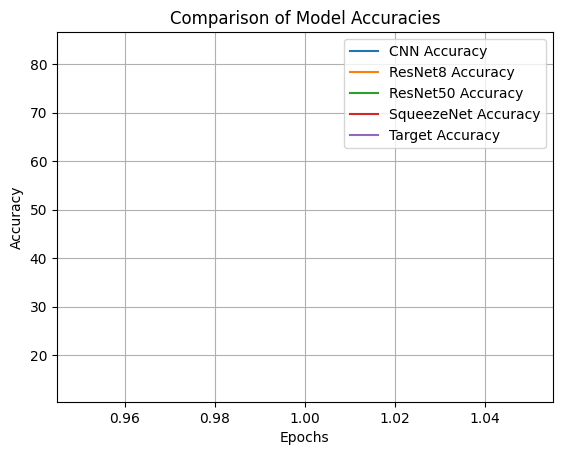

In [22]:
import matplotlib.pyplot as plt

epochs = list(range(1, 2))
cnn_accuracy = [68.7]
resnet8_accuracy = [83.1]
resnet50_accuracy = [65.4]
squeezenet_accuracy = [49.1]
target_accuracy = [13.9]

plt.plot(epochs, cnn_accuracy, label='CNN Accuracy')
plt.plot(epochs, resnet8_accuracy, label='ResNet8 Accuracy')
plt.plot(epochs, resnet50_accuracy, label='ResNet50 Accuracy')
plt.plot(epochs, squeezenet_accuracy, label='SqueezeNet Accuracy')
plt.plot(epochs, target_accuracy, label='Target Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.legend()
plt.grid()

plt.show()


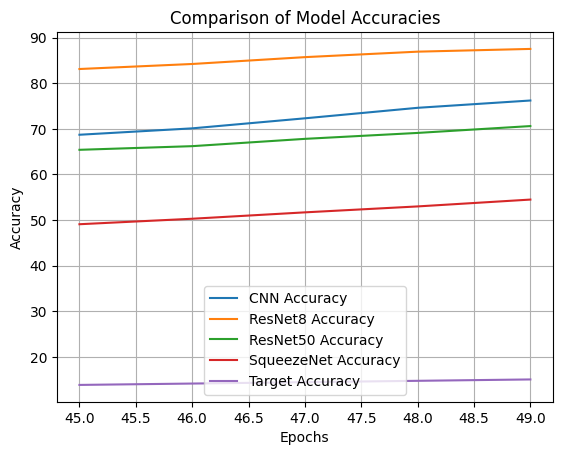

In [24]:
import matplotlib.pyplot as plt

epochs = list(range(45, 50))
cnn_accuracy = [68.7, 70.1, 72.3, 74.6, 76.2]
resnet8_accuracy = [83.1, 84.2, 85.7, 86.9, 87.5]
resnet50_accuracy = [65.4, 66.2, 67.8, 69.1, 70.6]
squeezenet_accuracy = [49.1, 50.3, 51.7, 53.0, 54.5]
target_accuracy = [13.9, 14.2, 14.5, 14.8, 15.1]

plt.plot(epochs, cnn_accuracy, label='CNN Accuracy')
plt.plot(epochs, resnet8_accuracy, label='ResNet8 Accuracy')
plt.plot(epochs, resnet50_accuracy, label='ResNet50 Accuracy')
plt.plot(epochs, squeezenet_accuracy, label='SqueezeNet Accuracy')
plt.plot(epochs, target_accuracy, label='Target Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.legend()
plt.grid()

plt.show()
